In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd


In [ ]:
from tensorflow.keras import models, layers
from tensorflow.keras import callbacks
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
#import the data (inbuilt)
from tensorflow.keras.datasets import fashion_mnist

In [ ]:
# splitting into training and testing data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
#check the shape of the data


print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [ ]:
print(x_train)
print(x_test)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ...

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline  #display plot in cell and not in seperate window
import matplotlib.cm as cm    #cm=colormaps

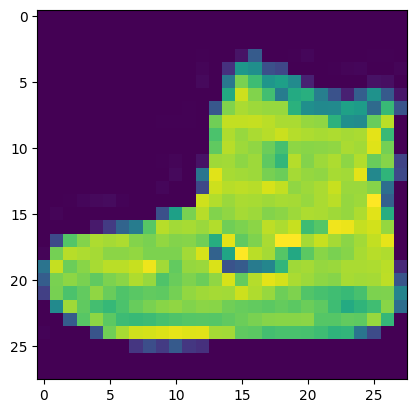

In [ ]:
#display the images in the dataset
plt.imshow(x_train[0])

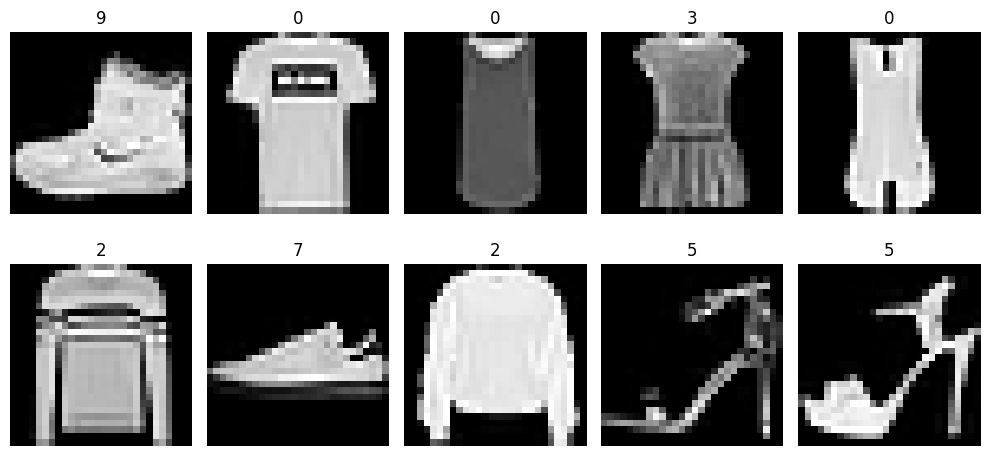

In [ ]:
#print some of the images in gray scale
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)  # 2 rows, 5 columns and i+1 is the index or seerial number
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"{y_train[i]}")
    plt.axis('off')     #no ticks or grids and axis around the image
plt.tight_layout()     #to adjust the space between the plot and prevent overlapping
plt.show()

In [ ]:
#to normalize the data into range of 0 to 1
x_train=x_train/255
x_test=x_test/255


In [ ]:
# check the shape of the  x and y data
print("shape of x" ,x_train.shape)
print("shape of y" , y_train.shape)


dimension of x (60000, 28, 28)
print dimension of y (60000,)


In [ ]:
# check the dimension of the  x and y data
print("dimension of x : " ,x_train.ndim)
print("dimension of y : " , y_train.ndim)

dimension of x :  3
dimension of y :  1


In [ ]:
#reshape the data into 28x28 pixels in grayscale(1)
x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)

In [ ]:
# check the shape of the  x and y data
print("shape of x" ,x_train.shape)
print("shape of y" , y_train.shape)


shape of x (60000, 28, 28, 1)
shape of y (60000,)


In [ ]:
input_shape=(28 , 28 , 1)

# **Build Model**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D,BatchNormalization
from keras.callbacks import EarlyStopping,ModelCheckpoint

In [ ]:
#Callbacks
early_stop = EarlyStopping(
    monitor = 'val_loss',
    patience = 5,
    verbose = 1,
    mode = 'min',
    restore_best_weights = True
)

In [ ]:
model=Sequential()
model.add(
    Conv2D(
        32, # no of filters
        kernel_size=(3, 3), # Size of the filter
        strides=(1, 1), # how many steps the filter shift after a step
        padding='valid',  #we dont require padding (padding prevents the elimination of coreners of data)
        activation='relu', #converts -ve to 0 and used to prevent vanising gradient problem
        input_shape=(28, 28, 1) # The expected input shape for this layer
    )
)


model.add(MaxPooling2D(pool_size=(2, 2)))  #reduces dimensions without losing important info
model.add(BatchNormalization())  #normalize the output layer


model.add(Conv2D(64, (3, 3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

#flatten the nD image to 1D vector (for adding dense layers )
model.add(Flatten())

#he uniform gives initial weights  of kernel from uniform dist (if not he uniform random weights are given)
model.add(Dense(250, activation='relu',kernel_initializer='he_uniform'))



#dropout layer to drop random neurons
model.add(Dropout(0.35))


model.add(Dense(128, activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.35))
model.add(Dense(64, activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.35))
model.add(Dense(32, activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.35))


model.add(Dense(10, activation='softmax'))  #10 is number of categories

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 13, 13, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 5, 5, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 250)            │       400,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 250)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 462,244 (1.76 MB)

 Trainable params: 462,052 (1.76 MB)

 Non-trainable params: 192 (768.00 B)

In [ ]:
from tensorflow.keras.utils import to_categorical

#One Hot Encoding

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam


#commenting this code to execute the model using trained model



#Train the Model
checkpointer = ModelCheckpoint(filepath='model_weights.best.keras',verbose=1,save_best_only=True)


# Compile the model
model.compile(loss='categorical_crossentropy', #loss func for multi class
              optimizer=Adam(),  #optimizer to minimize the loss
              metrics=['accuracy'])

hist = model.fit(
    x_train,
    y_train,
    batch_size=64,  #no of samples per training
    epochs=20,  #no of iterations of training
    validation_split=0.35,
    callbacks=[checkpointer,early_stop],
    verbose=1,   #progress line
    shuffle=True  # to prevent bias
    )


Epoch 1/20
610/610 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.7811 - loss: 0.6249
Epoch 1: val_loss improved from inf to 0.42191, saving model to model_weights.best.keras
610/610 ━━━━━━━━━━━━━━━━━━━━ 51s 76ms/step - accuracy: 0.7812 - loss: 0.6248 - val_accuracy: 0.8581 - val_loss: 0.4219
Epoch 2/20
609/610 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.8369 - loss: 0.4865
Epoch 2: val_loss improved from 0.42191 to 0.35676, saving model to model_weights.best.keras
610/610 ━━━━━━━━━━━━━━━━━━━━ 87s 85ms/step - accuracy: 0.8370 - loss: 0.4865 - val_accuracy: 0.8783 - val_loss: 0.3568
Epoch 3/20
609/610 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.8571 - loss: 0.4300
Epoch 3: val_loss improved from 0.35676 to 0.34599, saving model to model_weights.best.keras
610/610 ━━━━━━━━━━━━━━━━━━━━ 53s 86ms/step - accuracy: 0.8571 - loss: 0.4300 - val_accuracy: 0.8790 - val_loss: 0.3460
Epoch 4/20
609/610 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.8739 - loss: 0.3826
Epoch 4: val_loss im

In [ ]:
# saving model
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
model.save('/content/drive/MyDrive/saved_ML_models/micro_project_2(fashion).h5')


NameError: name 'model' is not defined

In [ ]:
#loading model saved

from tensorflow.keras.models import load_model
model = load_model('/content/drive/MyDrive/saved_ML_models/micro_project_2(fashion).h5')

In [ ]:
#evaluate model
loss, accuracy = model.evaluate(x_test,y_test)
loss1,accuracy1 = model.evaluate(x_train,y_train)
print(f"Test Accuracy : {accuracy:.2f}")
print(f"Test Loss : {loss:.2f}")
print(f"Train Accuracy : {accuracy1:.2f}")
print(f"Train Loss : {loss1:.2f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.8970 - loss: 0.3473
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.9322 - loss: 0.1941
Test Accuracy : 0.90
Test Loss : 0.33
Train Accuracy : 0.92
Train Loss : 0.23


In [ ]:
#as per the categories , mapping the labels

cifar10_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
#classification report

y_pred = model.predict(x_test)
predicted_classes = np.argmax(y_pred, axis=1)
print(classification_report(np.argmax(y_test, axis=1), predicted_classes, target_names=cifar10_labels))

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
              precision    recall  f1-score   support

 T-shirt/top       0.80      0.89      0.84      1000
     Trouser       1.00      0.98      0.99      1000
    Pullover       0.87      0.81      0.84      1000
       Dress       0.89      0.92      0.91      1000
        Coat       0.81      0.88      0.84      1000
      Sandal       0.97      0.98      0.98      1000
       Shirt       0.73      0.64      0.68      1000
     Sneaker       0.94      0.97      0.96      1000
         Bag       0.99      0.94      0.97      1000
  Ankle boot       0.98      0.95      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



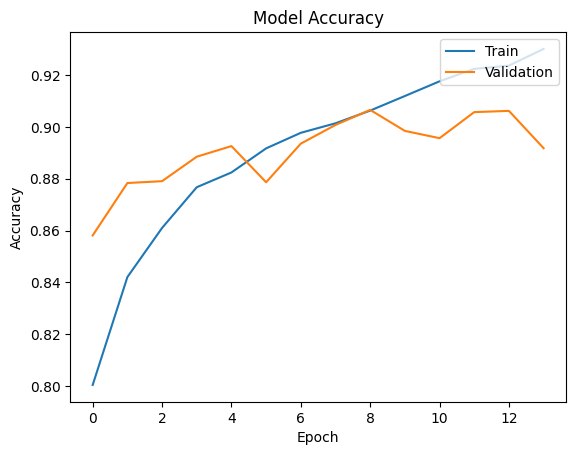

In [ ]:
#plotting the model accuracy per epoch wise

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

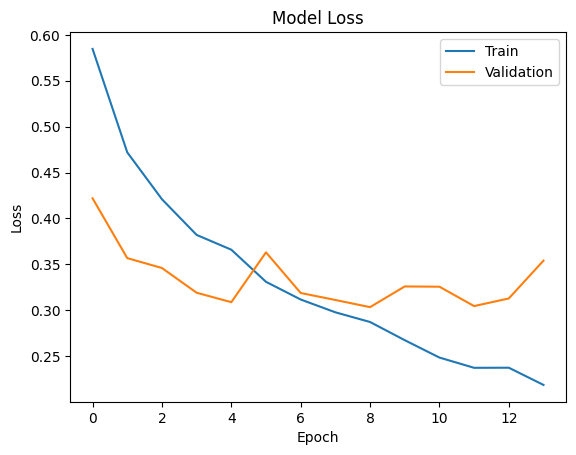

In [ ]:
#plotting loss per epoch

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [ ]:
y_hat = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


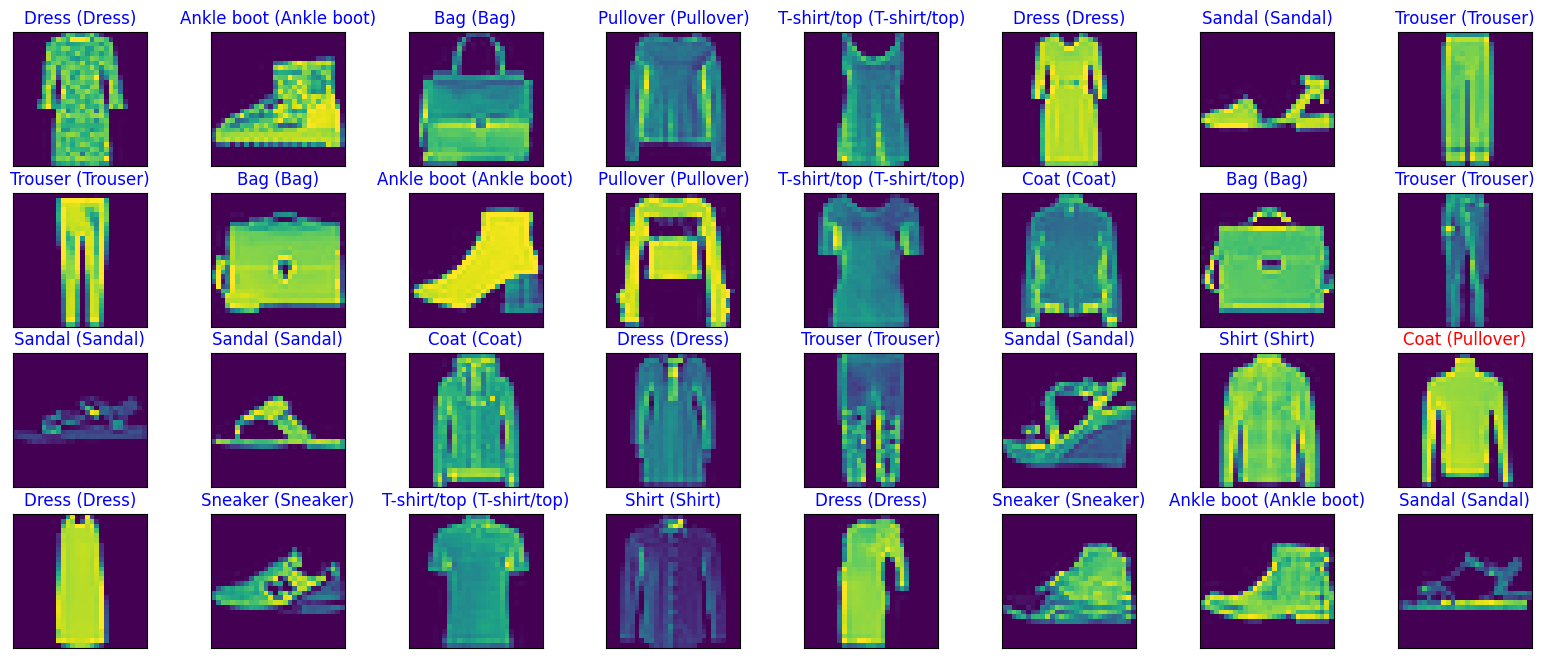

In [ ]:
#Plot a random sample of test images, their predicted label and the ground truth
rdm_indices=[618, 4698, 9824, 8465, 9751, 1022, 5894, 4498, 5607, 3213, 6998, 314, 374, 425, 4741, 7384, 8303, 4004, 4646, 6906, 733,221, 3799, 4255, 1520, 3652, 3628, 7373, 8959, 705, 9370, 895]

fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(rdm_indices):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(x_test[idx])
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title(
        "{} ({})".format(cifar10_labels[pred_idx], cifar10_labels[true_idx]),
        color=("blue" if pred_idx == true_idx else "red")
    )

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def convert_to_fashion_mnist(image_path):
    # 1. Load the image
    img = cv2.imread(image_path)

    # 2. Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # 3. Resize the image to 28x28
    resized = cv2.resize(gray, (28, 28))

    # 4. Invert the colors (Fashion MNIST has white clothes on black background)
    inverted = cv2.bitwise_not(resized)

    # 5. Normalize to range [0, 1]
    normalized = inverted / 255.0

    # 6. Reshape to add batch size and channel dimension
    reshaped = normalized.reshape(1, 28, 28, 1)

    return reshaped



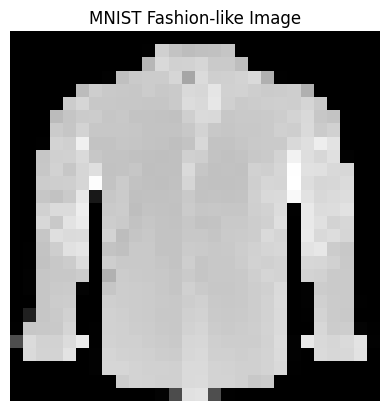

In [ ]:
#Custom input
fashion_like_img = convert_to_fashion_mnist("/content/drive/MyDrive/Colab Datasets/jacket.jpg")

# show the image
plt.imshow(fashion_like_img[0, :, :, 0], cmap='gray')
plt.title("MNIST Fashion-like Image")
plt.axis('off')
plt.show()

In [ ]:
prediction = model.predict(fashion_like_img)

# Get the predicted class index
predicted_class_index = np.argmax(prediction)

# Get the corresponding label from the defined labels
predicted_label = cifar10_labels[predicted_class_index]

print("Predicted class index:", predicted_class_index)
print("Predicted label:", predicted_label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Predicted class index: 4
Predicted label: Coat


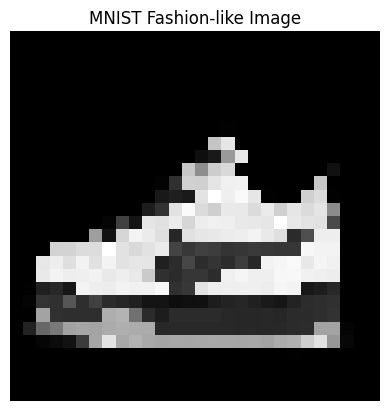

In [ ]:
#Custom input
fashion_like_img = convert_to_fashion_mnist("/content/drive/MyDrive/Colab Datasets/sneaker.png")

# show the image
plt.imshow(fashion_like_img[0, :, :, 0], cmap='gray')
plt.title("MNIST Fashion-like Image")
plt.axis('off')
plt.show()

In [ ]:
prediction = model.predict(fashion_like_img)

# Get the predicted class index
predicted_class_index = np.argmax(prediction)

# Get the corresponding label from the defined labels
predicted_label = cifar10_labels[predicted_class_index]

print("Predicted class index:", predicted_class_index)
print("Predicted label:", predicted_label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Predicted class index: 7
Predicted label: Sneaker
